## ARMA on stock price

In this notebook, we are starting to do forecasting on stock price, the method we are using is ARMA.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA     # The package of ARMA mathod
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    #  acf and pacf are functions used to test stationary conditions

In [2]:
#Load data
stock =  pd.read_csv('AALStock_processed.csv')
timeSer = stock['Close']       # We only use this list of time-series data in this notebook

acf stands for auto-correlation function, for any time series Xt, it tests how much the series X[k:t] is correlated to X[0:t-k] for each k, therefore the x-axis of the acf plot is k.
pacf is partial acf, it tests how much the residual r[t+1] is correlated to X[t-k+1], similarly, the x-axis of pacf plot is k.

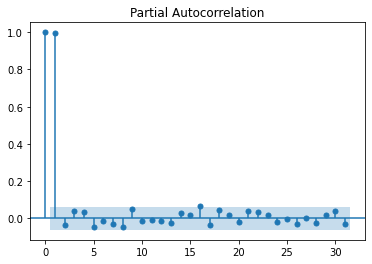

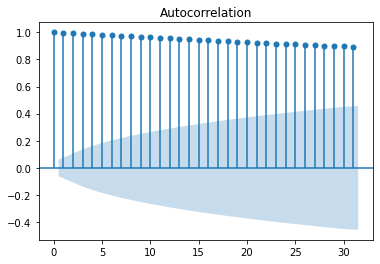

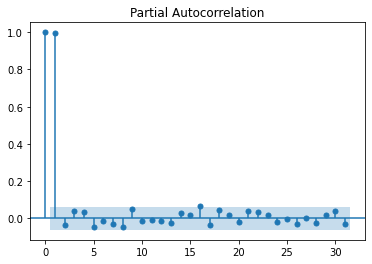

In [3]:
plot_acf(timeSer)
plot_pacf(timeSer)

pacf converges to 0 almost immediately, but acf converges very slowly, hence we have to do DM on the data to make it more stationary. This is actually the Growth column of stock data.

In [4]:
# diff tool given by numpy package
timeSer = np.diff(timeSer)

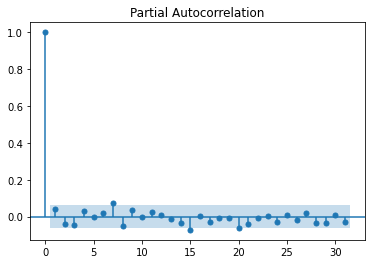

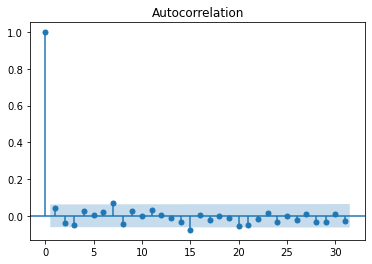

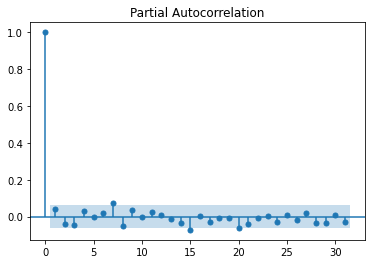

In [5]:
plot_acf(timeSer)
plot_pacf(timeSer)

Much better, we can agree that the data is stationary enough to do ARMA

In [12]:
from itertools import product  
#Prepare a list of parameters which is all pairs of p and q
ps = range(0, 10) # I train the model using (p=10,q=10), but that is too slow, and the best parameters are (p=4,q=7)
qs = range(0, 10)
parameters = product(ps, qs)
parameters_list = list(parameters)

#aic is used to find the best pair of parameters, allowing it to be maximally infinite
best_aic = float('inf')
#The result list
results = []
for param in parameters_list:
    model = ARMA(timeSer, order=(param[0], param[1])).fit() #Construct a model with each pair of parameters
    aic = model.aic
    if aic < best_aic:   #Choose the model with the minimal aic
        best_model = model
        best_aic = model.aic
        best_param = param
    results.append([param, model.aic])
results_table = pd.DataFrame(results)
results_table.columns = ['parameters', 'aic']
print(results)

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available',

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and


E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

[[(0, 0), 2652.6154850224634], [(0, 1), 2652.6843226699057], [(0, 2), 2653.3781730419105], [(0, 3), 2652.9414231225937], [(0, 4), 2653.5920753574505], [(0, 5), 2655.5779662941113], [(0, 6), 2657.4067173129843], [(0, 7), 2653.7646557888165], [(0, 8), 2654.8605392825084], [(0, 9), 2656.0682556686393], [(1, 0), 2652.8386000906094], [(1, 1), 2654.298314098597], [(1, 2), 2654.5995445591257], [(1, 3), 2654.1375309894606], [(1, 4), 2654.712059736709], [(1, 5), 2655.4479285187876], [(1, 6), 2657.7837458838485], [(1, 7), 2653.971193101951], [(1, 8), 2655.9344948877424], [(1, 9), 2657.849456482339], [(2, 0), 2652.9808300325176], [(2, 1), 2654.2318926214894], [(2, 2), 2651.012044072298], [(2, 3), 2654.1679847364994], [(2, 4), 2646.988788652853], [(2, 5), 2647.5372985099525], [(2, 6), 2652.7998970342687], [(2, 7), 2655.9102026202117], [(2, 8), 2657.76213951424], [(2, 9), 2659.6731674816674], [(3, 0), 2653.0186990912316], [(3, 1), 2654.418462861355], [(3, 2), 2654.191929369475], [(3, 3), 2655.85988

E:\Anaconda\envs\lab\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda\envs\lab\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [13]:
#Form a prediction
predict = best_model.predict(start=0, end=1001)

In [14]:
#Since we do ARMA on the 1st order difference, we need to add them back
pprice = np.linspace(0,1,1003)
pprice[0] = stock['Close'][0]
for i in range(1002):
    pprice[i+1] = pprice[i]+predict[i]

In [15]:
stock['Predprice'] = pprice   #Put the result in the stock data
stock.iloc[:,0] = pd.to_datetime(stock.iloc[:,0],format='%Y-%m-%d')   #Change the type of date

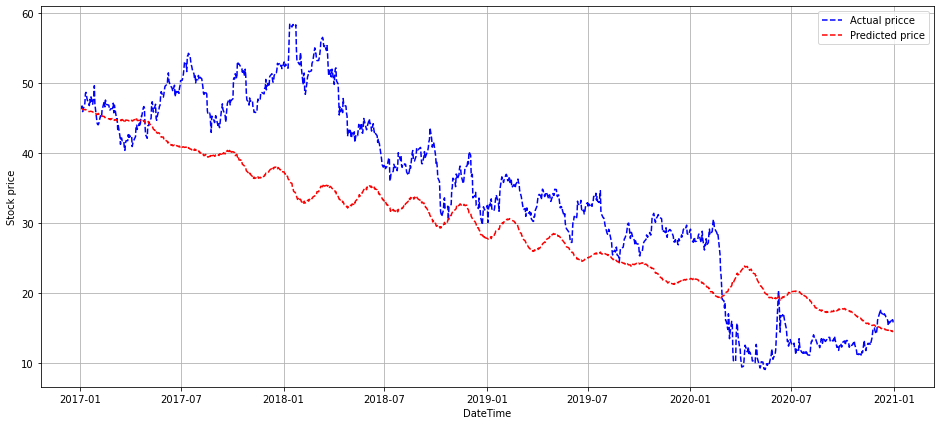

In [16]:
plt.figure(figsize=[16,7])
plt.plot(stock.iloc[:,0],stock.iloc[:,2],label='Actual pricce',linestyle='--',  c='b')
plt.plot(stock.iloc[:,0],stock.iloc[:,8],label='Predicted price',linestyle='--', c='r')
plt.xlabel('DateTime')
plt.ylabel('Stock price')
plt.grid()
plt.legend()
plt.show()

This is not a very good prediction on the stock price, now let's focus on data in May only.

In [24]:
#Form a prediction on May 2020 only
predict = best_model.predict(start=836, end=1001)

In [25]:
pprice = np.linspace(0,1,1003)
pprice[0:836] = stock['Close'][0:836]  #This time we copy all the data before May 2020
for i in range(1002-836):
    pprice[i+836] = pprice[i+835]+predict[i]

In [26]:
stock['Predprice2'] = pprice

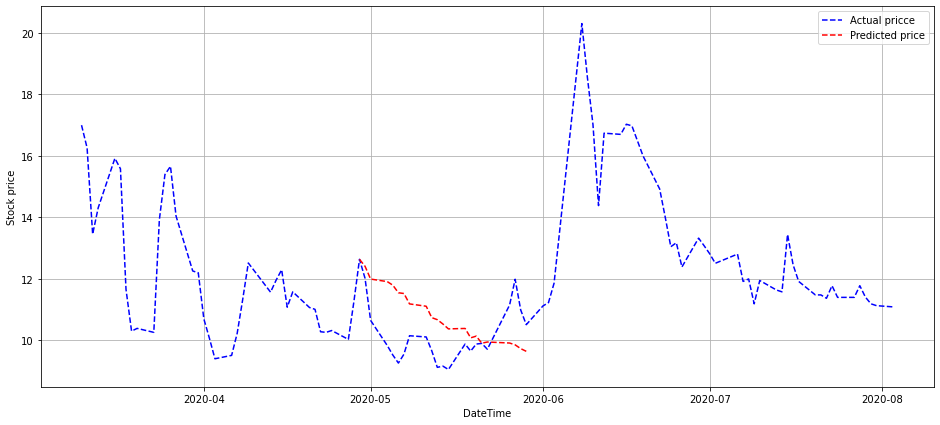

In [35]:
plt.figure(figsize=[16,7])
plt.plot(stock.iloc[800:900,0],stock.iloc[800:900,2],label='Actual pricce',linestyle='--',  c='b')
plt.plot(stock.iloc[835:857,0],stock.iloc[835:857,9],label='Predicted price',linestyle='--', c='r')
plt.xlabel('DateTime')
plt.ylabel('Stock price')
plt.grid()
plt.legend()
plt.show()

Looks nice, calculate the mean squared error of the prediction, which is the sum of square of residuals divided by number of predicted data.

In [40]:
print(np.sum(np.power(np.subtract(stock.iloc[835:857,2],stock.iloc[835:857,9]),2))/21)

1.8539249796797708


Now let's improve the model with the external data we prepare, which are the volume of stock and oil price, these are proven to be sort of correlated to stock price.

In [42]:
oil = pd.read_csv('Oil_processed.csv')  #Load data
#Sort oil price
oil.sort_values('Date',inplace=True)
oil.iloc[:,0] = pd.to_datetime(oil.iloc[:,0],format='%Y-%m-%d')   #Change the type of date
#Rename the datetime column in order to merge with oil price data
stock.rename(columns={'TimeKey':'Date'},inplace=True)
# Merging
result = pd.merge(stock, oil, on=['Date'])
print(result)

           Date  Open_x  Close_x  High_x  Low_x  Volume_x  Fluctuation  \
0    2017-01-03   47.28    46.30   47.34  46.14   6737800         0.22   
1    2017-01-04   46.63    46.70   47.44  46.35   5859600         1.02   
2    2017-01-05   46.52    45.89   46.93  45.61   6825300         0.69   
3    2017-01-06   45.85    46.21   46.72  45.47   7260200         0.89   
4    2017-01-09   46.01    47.08   47.34  45.78   4739100         0.49   
...         ...     ...      ...     ...    ...       ...          ...   
996  2020-12-24   16.04    15.66   16.04  15.53  29393443         0.13   
997  2020-12-28   15.97    16.06   16.46  15.91  56629125         0.46   
998  2020-12-29   16.32    15.86   16.41  15.75  49187272         0.20   
999  2020-12-30   15.85    16.15   16.20  15.72  47919183         0.18   
1000 2020-12-31   16.08    15.77   16.09  15.63  56555621         0.15   

      Growth  Predprice  Predprice2  Close_y  Open_y  High_y  Low_y Volume_y  \
0       0.00  46.300000   46.30

In [64]:
print(result['Date'][855])   #Start of June

2020-06-01 00:00:00


As what we detected in correlation notebook, stock price is correlated to volume^-1/3 and oil price^2, so we have to do preproccessing, as well as normalization in order to speed up convergence process.

In [57]:
#Normalization
result['norm_volume'] = 1000/(np.power(result['Volume_x'],1/3))
result['norm_oil'] = np.power(result['Close_y'],2)/100             

In [58]:
#Train set, only the data after pandemic are prepared because correlation exists only on oil price after pandemic
X=result[['Predprice','norm_volume','norm_oil']][771:835]

In [59]:
print(X)

     Predprice  norm_volume   norm_oil
771  21.049499     4.375304  28.601104
772  21.062573     4.791808  28.440889
773  21.060915     4.540131  27.185796
774  20.842081     4.492648  26.584336
775  20.773937     5.079127  25.110121
..         ...          ...        ...
830  22.775654     2.459245   2.869636
831  22.694621     2.457493   1.633284
832  22.376036     2.058500   1.522756
833  22.417705     2.064360   2.268036
834  22.037354     2.194926   3.549456

[64 rows x 3 columns]


In [60]:
#Train set
Y=result['Close_x'][771:835]

We use linear regression to do machine learning.

In [65]:
#Import linear regression package
from sklearn.linear_model import LinearRegression
#Test set
xTest = result[['Predprice','norm_volume','norm_oil']][835:855]
yTest = result['Close_x'][835:855]

In [67]:
# This part refers to applied machine learning course week1
# sklearn functions implementation
def multilinearRegrPredict(xtrain, ytrain,xtest ):
    # Create linear regression object
    reg=LinearRegression()
    # Train the model using the training sets
    reg.fit(xtrain,ytrain)
    # Make predictions using the testing set
    y_pred = reg.predict(xtest)
    # See how good it works in test data, 
    # we print out one of the true target and its estimate

    return y_pred

#Make the prediction
y_pred = multilinearRegrPredict(X, Y, xTest)

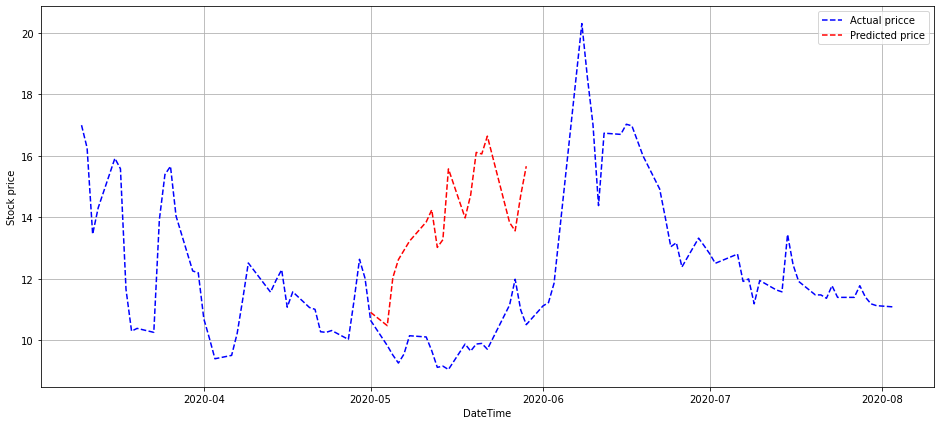

In [69]:
plt.figure(figsize=[16,7])
plt.plot(stock.iloc[800:900,0],stock.iloc[800:900,2],label='Actual pricce',linestyle='--',  c='b')
plt.plot(result.iloc[835:855,0],y_pred,label='Predicted price',linestyle='--', c='r') #Plot only the data in May
plt.xlabel('DateTime')
plt.ylabel('Stock price')
plt.grid()
plt.legend()
plt.show()

A bit worse, but it does predict that the stock price will rise up in the near future. The mean squared error is:

In [73]:
print(np.sum(np.power(np.subtract(result.iloc[835:855,2],y_pred),2))/19)

19.343716995627076
